# Read the Data

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('imdb_master.csv', encoding = 'ISO-8859-1')
data.columns = ["UserId","Type","Review","Label","File"]

In [3]:
data.shape

(100000, 5)

In [4]:
df = data.iloc[:,[0,1,2,3]]

In [5]:
df

,UserId,Type,Review,Label
0,0,test,Once again Mr. Costner has dragged out a movie...,neg
1,1,test,This is an example of why the majority of acti...,neg
2,2,test,"First of all I hate those moronic rappers, who...",neg
3,3,test,Not even the Beatles could write songs everyon...,neg
4,4,test,Brass pictures (movies is not a fitting word f...,neg
5,5,test,"A funny thing happened to me while watching ""M...",neg
6,6,test,This German horror film has to be one of the w...,neg
7,7,test,"Being a long-time fan of Japanese film, I expe...",neg
8,8,test,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",neg
9,9,test,Wealthy horse ranchers in Buenos Aires have a ...,neg


In [6]:
def numeric_label(Label):
    if Label == 'neg':
        return 0
    elif Label == 'pos':
        return 1
    else:
        return 2  

In [7]:
df['Label'] = df.Label.apply(numeric_label)

C:\Users\ujali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.shape

(100000, 4)

In [9]:
Final_df = df[df.Label!=2]

In [10]:
Final_df.shape

(50000, 4)

# Clean the Data

In [11]:
import string
from nltk.corpus import stopwords
def split_words(Review):
    ListofWords = []
    
    #make all words in same case i.e., lower case
    ListofWords =[t for t in Review.split(' ')]
    words = [word.lower() for word in ListofWords]
    
    #remove punctuation marks from all data
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    
    # remove remaining tokens that are not alphabetic
    alpha_words = [word for word in stripped if word.isalpha()]
    
    #remove stop words from the data
    stop_words = set(stopwords.words('english'))
    final_words = [w for w in alpha_words if not w in stop_words]    
    
    return final_words

In [ ]:
Final_df['Splitted_Words'] = Final_df.Review.apply(split_words)

In [13]:
Final_df.shape

(50000, 5)

In [14]:
ListofReview = []
for i in Final_df.Splitted_Words:
    if isinstance(i,list):  
        for nested_i in i:
            ListofReview.append(nested_i)

In [15]:
len(ListofReview)

6066723

In [16]:
import numpy as np
Countwords = {}
arrayAllWords = np.array(ListofReview)
Countwords = np.unique(arrayAllWords, return_counts=True)

In [17]:
keywords=[]
for i in range(0,len(Countwords[1])):
    if (Countwords[1][i] >= 20):
        keywords.append(Countwords[0][i])
#keywords=list(set(keywords))

In [18]:
len(keywords)

20105

# Split the data in Train and Test

In [19]:
Test_df = Final_df[Final_df.Type=='test']

In [20]:
Test_df.shape

(25000, 5)

In [21]:
Train_df = Final_df[Final_df.Type=='train']

In [22]:
Train_df.shape

(25000, 5)

In [23]:
def get_popular_keywords(Splitted_Words):
    ListFinalWords = []
    for i in Splitted_Words:
        if (i in keywords):
            ListFinalWords.append(i)
    return ListFinalWords

In [24]:
Train_df['Keywords'] = Train_df.Splitted_Words.apply(get_popular_keywords)

C:\Users\ujali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
Test_df['Keywords'] = Test_df.Splitted_Words.apply(get_popular_keywords)

C:\Users\ujali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
ListofKeywords = []
for i in Train_df.Keywords:
    str1 = ' '.join(i)
    ListofKeywords.append(str1)

In [27]:
len(ListofKeywords)

25000

# Tfldf Vectorizer

In [28]:
import sklearn.feature_extraction.text as sk_text
vectorizer_tfldf = sk_text.TfidfVectorizer(
                            #stop_words='english',
                             #max_features = 1000,
                             min_df=20, max_features=250)


#max_features:  build a vocabulary that only consider the top max_features features ordered by term frequency across the corpus.

matrix_tfldf_train = vectorizer_tfldf.fit_transform(ListofKeywords)
matrix_tfldf_train1 = matrix_tfldf_train.toarray()
print(type(matrix_tfldf_train))          # Compressed Sparse Row matrix
print(matrix_tfldf_train.toarray())        #  convert it to numpy array

print(vectorizer_tfldf.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.05325475  0.07191262  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.15345576  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.23002861  0.          0.        ]]
['acting', 'action', 'actor', 'actors', 'actually', 'almost', 'along', 'also', 'although', 'always', 'american', 'another', 'anyone', 'anything', 'around', 'audience', 'away', 'back', 'bad', 'beautiful', 'believe', 'best', 'better', 'big', 'bit', 'black', 'book', 'boring', 'br', 'cant', 'cast', 'character', 'characters', 'classic', 'come', 'comedy', 'comes', 'completely', 'could', 'course', 'day', 'dead', 'death', 'didnt', 'different', 'director', 'doesnt', 'done', 'don

In [29]:
matrix_tfldf_train1.shape

(25000, 250)

In [30]:
ListofGroundTruthTrain = []
for i in Train_df.Label:
    ListofGroundTruthTrain.append(i)

In [31]:
ListofGroundTruthTest = []
for i in Test_df.Label:
    ListofGroundTruthTest.append(i)

In [32]:
X_train, y_train = matrix_tfldf_train1, ListofGroundTruthTrain

In [33]:
print(X_train.shape)

(25000, 250)


In [34]:
print(len(y_train))

25000


In [35]:
ListofKeywordsTest = []
for i in Test_df.Keywords:
    str2 = ' '.join(i)
    ListofKeywordsTest.append(str2)

In [36]:
import sklearn.feature_extraction.text as sk_text
vectorizer_tfldf1 = sk_text.TfidfVectorizer(
                            #stop_words='english',
                             #max_features = 1000,
                             min_df=20, max_features=250)


#max_features:  build a vocabulary that only consider the top max_features features ordered by term frequency across the corpus.

matrix_tfldf_test = vectorizer_tfldf1.fit_transform(ListofKeywordsTest)
matrix_tfldf_test1 = matrix_tfldf_train.toarray()
print(type(matrix_tfldf_test))          # Compressed Sparse Row matrix
print(matrix_tfldf_test.toarray())        #  convert it to numpy array

print(vectorizer_tfldf1.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.26543364  0.2413191   0.         ...,  0.          0.          0.        ]
 [ 0.10816811  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.07232797  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.15550246  0.        ]]
['acting', 'action', 'actor', 'actors', 'actually', 'almost', 'along', 'also', 'although', 'always', 'american', 'another', 'anyone', 'anything', 'around', 'audience', 'away', 'back', 'bad', 'beautiful', 'believe', 'best', 'better', 'big', 'bit', 'black', 'book', 'boring', 'br', 'cant', 'cast', 'character', 'characters', 'come', 'comedy', 'comes', 'completely', 'could', 'couple', 'course', 'day', 'dead', 'death', 'didnt', 'different', 'director', 'doesnt', 'done', 'dont

In [37]:
X_test, y_test = matrix_tfldf_test1, ListofGroundTruthTest

In [38]:
print(X_test.shape)

(25000, 250)


In [39]:
print(len(y_test))

25000


# Decision Tree

In [40]:
import sklearn.metrics as metrics
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_tree_pred = dtree.predict(X_test)

#y_prob = dtree.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_tree_pred [:10])

test [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
pred [0 0 0 0 0 0 0 0 0 0]


In [41]:
print(metrics.confusion_matrix(y_test,y_tree_pred ))
print(metrics.precision_score(y_test,y_tree_pred ))  
print(metrics.recall_score(y_test,y_tree_pred ))      
print(metrics.f1_score(y_test,y_tree_pred ))          

[[12500     0]
 [    0 12500]]
1.0
1.0
1.0


# Logistic Regression

In [42]:
import sklearn.linear_model as linear_model

lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)

y_logistic_pred = lr_clf.predict(X_test)

#probs = lr_clf.predict_proba(X_test)

#print("test", y_test[:10])
#print("pred",y_logistic_pred[:10])


In [43]:
print(metrics.confusion_matrix(y_test,y_logistic_pred))
print(metrics.precision_score(y_test,y_logistic_pred))   
print(metrics.recall_score(y_test,y_logistic_pred))      
print(metrics.f1_score(y_test,y_logistic_pred))          

[[ 9824  2676]
 [ 2397 10103]]
0.790593943188
0.80824
0.799319593338


# Naive based

In [44]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_nb_pred = nb_clf.predict(X_test)

In [45]:
print(metrics.confusion_matrix(y_test,y_nb_pred))
print(metrics.precision_score(y_test,y_nb_pred))   
print(metrics.recall_score(y_test,y_nb_pred))      
print(metrics.f1_score(y_test,y_nb_pred))   

[[9513 2987]
 [3003 9497]]
0.760733739186
0.75976
0.760246557797


# Neural Network

In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), alpha=0.00001,max_iter=1000)
mlp.fit(X_train, y_train)
y_neural_pred = mlp.predict(X_test)

In [47]:
print(metrics.confusion_matrix(y_test,y_neural_pred))
print("Precision Score:: ",metrics.precision_score(y_test,y_neural_pred))
print("Recall Score:: ",metrics.recall_score(y_test,y_neural_pred))      
print("F1 score:: ",metrics.f1_score(y_test,y_neural_pred)) 

[[11593   907]
 [  752 11748]]
Precision Score::  0.928328723825
Recall Score::  0.93984
F1 score::  0.93404889684


# SVM

In [48]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)


y_svw_pred = svm_clf.predict(X_test)

#print("test", y_test[:10])
#print("pred", y_svw_pred [:10])

In [49]:
print(metrics.confusion_matrix(y_test,y_svw_pred ))
print(metrics.precision_score(y_test,y_svw_pred ))   
print(metrics.recall_score(y_test,y_svw_pred ))     
print(metrics.f1_score(y_test,y_svw_pred ))          

[[ 9310  3190]
 [ 2274 10226]]
0.762224209899
0.81808
0.789164994598


# k-NN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
# try K=1 through K=4 and record testing accuracy
k_range = list(range(1, 5))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.f1_score(y_test, y_pred, average= 'weighted'))

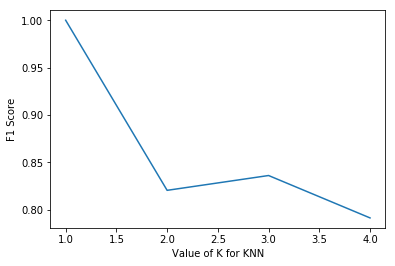

In [51]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 Score')
plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_fit = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

In [53]:
print(metrics.confusion_matrix(y_test,knn_predict))
print(metrics.precision_score(y_test,knn_predict))   
print(metrics.recall_score(y_test,knn_predict))      
print(metrics.f1_score(y_test,knn_predict))         

[[10400  2100]
 [ 1998 10502]]
0.833359784161
0.84016
0.83674607601
